In [1]:
import sys
import os
from dotenv import load_dotenv
load_dotenv()
sys.path.append(os.getenv("PATH_CURRENT"))

import pickle
import pandas as pd
from source.ensemble.stack_generalization.ramp_detection.utils_plot import plot_ramp_confusion_matrix, plot_ramp_events
from source.ensemble.stack_generalization.ramp_detection.ramp_analysis import load_and_append_results

import matplotlib.pyplot as plt
import seaborn as sns


def plot_score_bar(list_results, variable, score, title):
    " Plot the bar plot for Anomaly score "
    # Create DataFrame from the list of results
    df_results = pd.DataFrame(list_results)
    # Determine column names based on 'f1_score'
    columns = df_results.columns.tolist()
    columns[columns.index(score)] = score
    df_results.columns = columns
    # Plot the bar plot for F1-score
    plt.figure(figsize=(10, 7))
    sns.barplot(x=variable, y=score, data=df_results, palette="viridis")
    # Customize ticks and labels
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    # Add title
    plt.title(title)
    # Show plot
    plt.show()


# Set parameters
max_consecutive_points = 3
plot_results = 'TP'
cluster_color = False
plot_prediction = True
plot_iqw = False



In [2]:
list_quantile_thresholds_values = [0.90, 0.93, 0.95, 0.97, 0.99]
str_most_recent = f'{max_consecutive_points}_consecutive'

/var/folders/k7/l3pjpdtn7fg19hrh291yqwjw0000gn/T/ipykernel_1800/1626600386.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variable, y=score, data=df_results, palette="viridis")


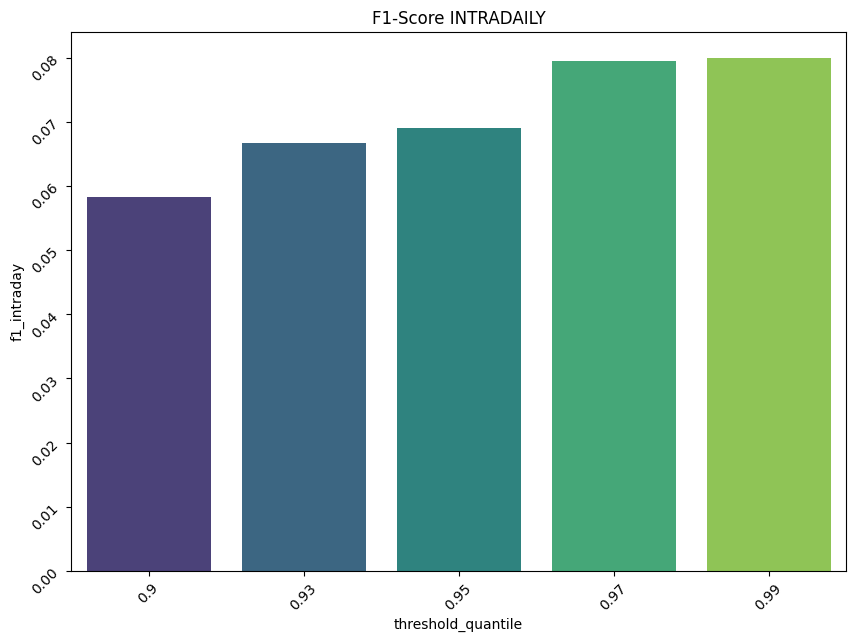

/var/folders/k7/l3pjpdtn7fg19hrh291yqwjw0000gn/T/ipykernel_1800/1626600386.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variable, y=score, data=df_results, palette="viridis")


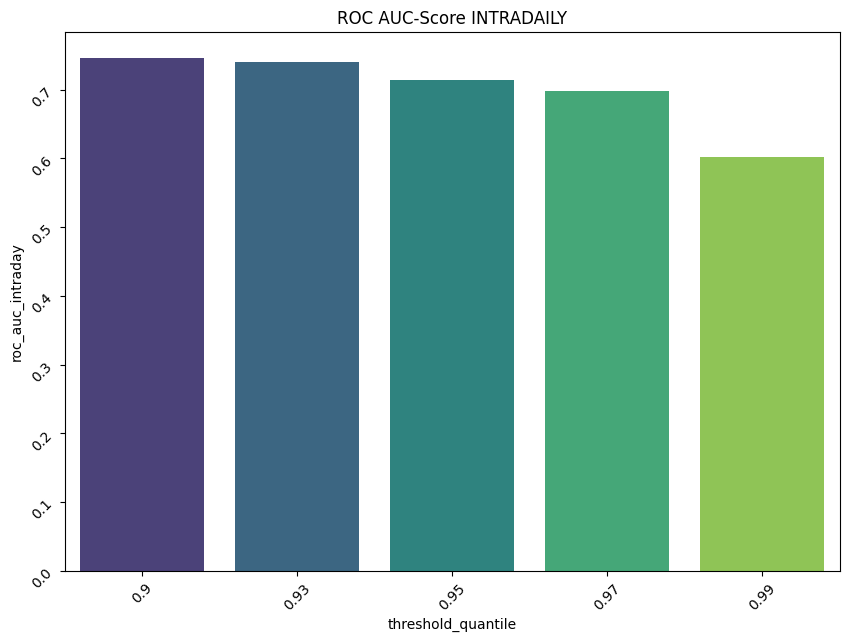

/var/folders/k7/l3pjpdtn7fg19hrh291yqwjw0000gn/T/ipykernel_1800/1626600386.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variable, y=score, data=df_results, palette="viridis")


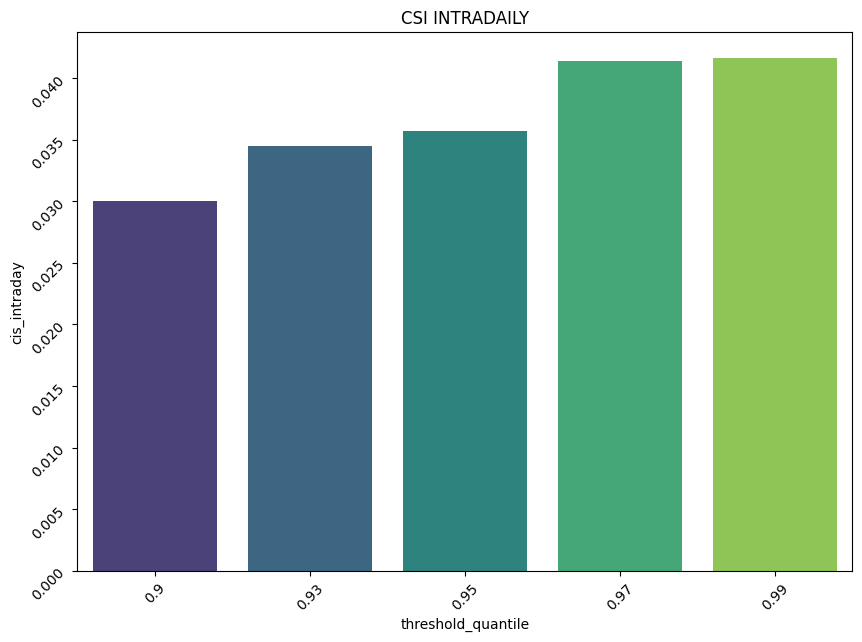

/var/folders/k7/l3pjpdtn7fg19hrh291yqwjw0000gn/T/ipykernel_1800/1626600386.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variable, y=score, data=df_results, palette="viridis")


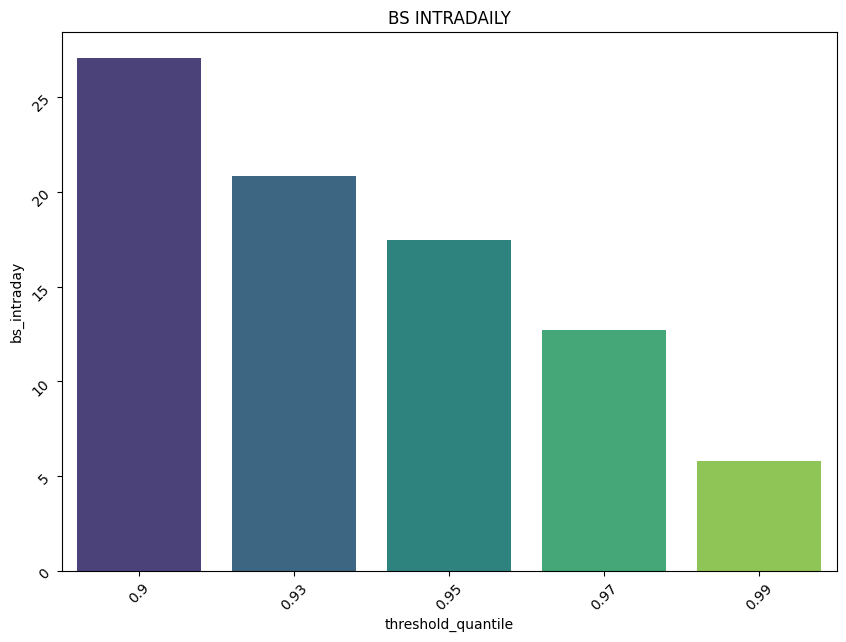

In [3]:
# Define the file paths for symmetric and asymmetric datasets
file_paths_f1 = [f'/Users/gio/Desktop/Elia-RES-Forecasting/results/eq/{str_most_recent}/{max_consecutive_points}_{quantile_threshold}_f1_eq.pkl' for quantile_threshold in list_quantile_thresholds_values]
file_paths_roc_auc = [f'/Users/gio/Desktop/Elia-RES-Forecasting/results/eq/{str_most_recent}/{max_consecutive_points}_{quantile_threshold}_roc_auc_eq.pkl' for quantile_threshold in list_quantile_thresholds_values]
file_path_cis = [f'/Users/gio/Desktop/Elia-RES-Forecasting/results/eq/{str_most_recent}/{max_consecutive_points}_{quantile_threshold}_cis_eq.pkl'for quantile_threshold in list_quantile_thresholds_values]
file_path_bs = [f'/Users/gio/Desktop/Elia-RES-Forecasting/results/eq/{str_most_recent}/{max_consecutive_points}_{quantile_threshold}_bs_eq.pkl'for quantile_threshold in list_quantile_thresholds_values]

list_results_f1_intraday = load_and_append_results(file_paths_f1, ['threshold_quantile', 'f1_intraday'])
list_results_roc_auc_intraday = load_and_append_results(file_paths_roc_auc, ['threshold_quantile', 'roc_auc_intraday'])
list_results_cis = load_and_append_results(file_path_cis, ['threshold_quantile', 'cis_intraday'])
list_results_bs = load_and_append_results(file_path_bs, ['threshold_quantile', 'bs_intraday'])

plot_score_bar(list_results=list_results_f1_intraday, variable='threshold_quantile', score='f1_intraday', title="F1-Score INTRADAILY")
plot_score_bar(list_results=list_results_roc_auc_intraday, variable='threshold_quantile', score='roc_auc_intraday', title='ROC AUC-Score INTRADAILY')
plot_score_bar(list_results=list_results_cis, variable='threshold_quantile', score='cis_intraday', title='CSI INTRADAILY')
plot_score_bar(list_results=list_results_bs, variable='threshold_quantile', score='bs_intraday', title='BS INTRADAILY')

Critical Success Index (CSI): 0.06
Bias Score (BS): 10.09
F1 Score: 0.11
ROC AUC: 0.64


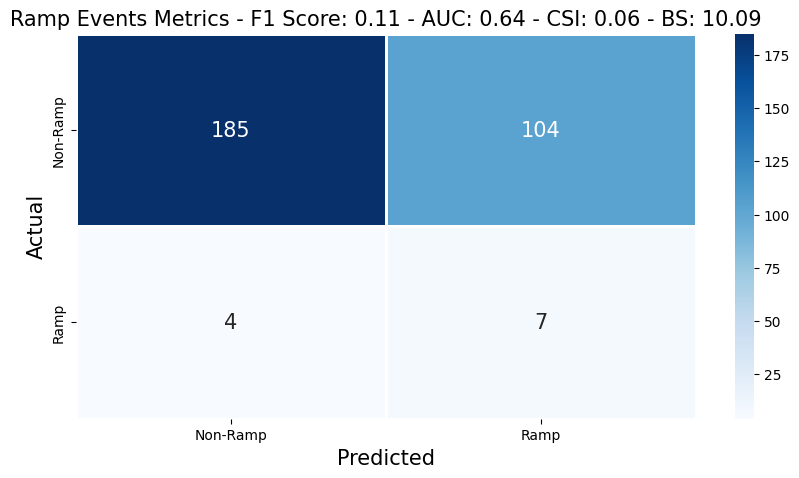

In [4]:
threshold_quantile = 0.97

# Load results for F1 scores
with open(f'/Users/gio/Desktop/Elia-RES-Forecasting/results/eq/{str_most_recent}/{max_consecutive_points}_{threshold_quantile}_f1_eq.pkl', 'rb') as f:
    data = pickle.load(f)

# Retrieve ramp events by date
ramp_events_intraday = [data[i]['ramp_events_by_date'] for i in range(len(data)) if data[i]['threshold_quantile'] == threshold_quantile][0]
# Plot confusion matrix
f1, roc_auc, csi, bs, fpr, tpr = plot_ramp_confusion_matrix(ramp_events_intraday)

Critical Success Index (CSI): 0.04
Bias Score (BS): 12.73
F1 Score: 0.08
ROC AUC: 0.70


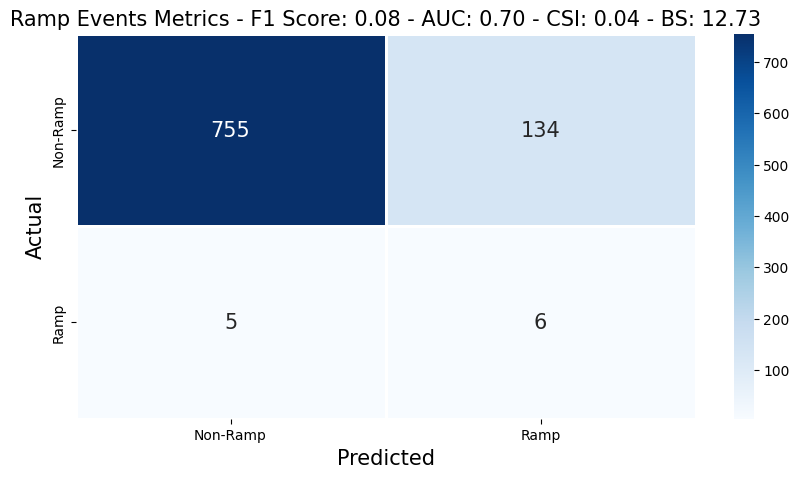

In [5]:

# Load results for F1 scores
with open(f'/Users/gio/Desktop/Elia-RES-Forecasting/results/eq/{str_most_recent}/{max_consecutive_points}_{threshold_quantile}_f1_eq.pkl', 'rb') as f:
    data = pickle.load(f)

# Retrieve ramp events by date
ramp_events_intraday = [data[i]['ramp_events_by_intraday'] for i in range(len(data)) if data[i]['threshold_quantile'] == threshold_quantile][0]
# Plot confusion matrix
f1, roc_auc, csi, bs, fpr, tpr = plot_ramp_confusion_matrix(ramp_events_intraday)

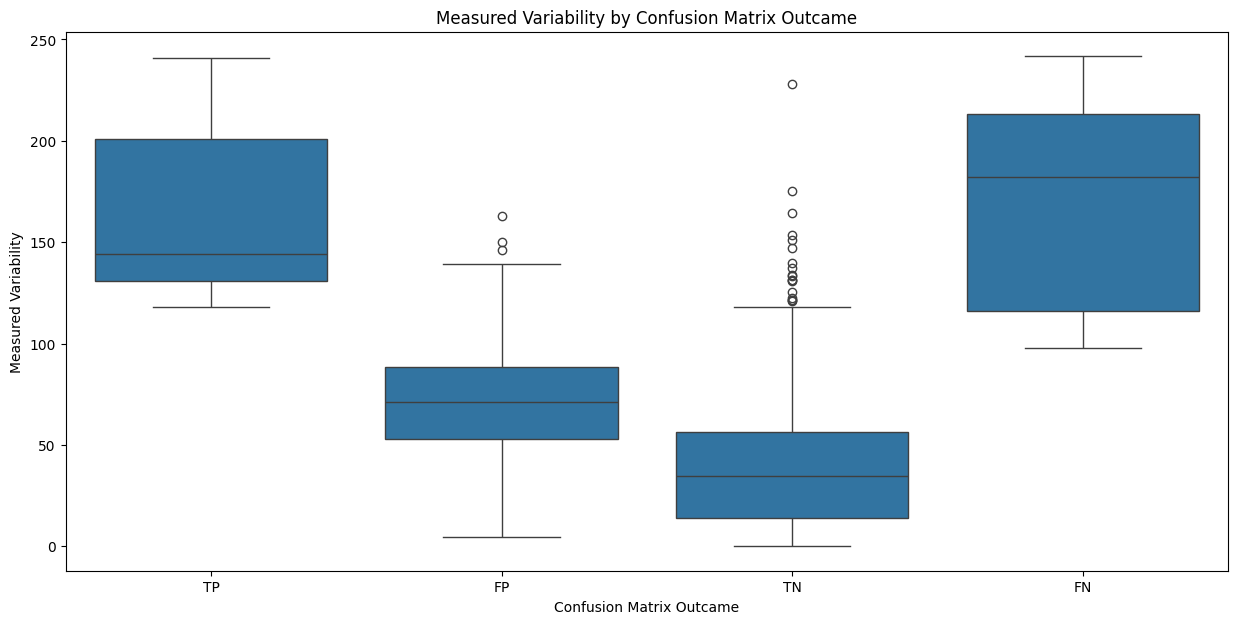

In [6]:

# Load results for F1 scores
with open(f'/Users/gio/Desktop/Elia-RES-Forecasting/results/eq/{str_most_recent}/{max_consecutive_points}_{threshold_quantile}_f1_eq.pkl', 'rb') as f:
    data = pickle.load(f)

# Retrieve ramp events by date
ramp_events_by_intraday = [data[i]['ramp_events_by_intraday'] for i in range(len(data)) if data[i]['threshold_quantile'] == threshold_quantile][0]

from config.ramp_calib_setting import Simulation
import pandas as pd
import pickle
from loguru import logger
from source.utils.file_read import process_and_concat_files 

sim_params = Simulation.testing_period

# process and concatenate files
files = [sim_params['file_1'], sim_params['file_2'], sim_params['file_3'], sim_params['file_4'], 
            sim_params['file_5'], sim_params['file_6'], sim_params['file_7'], sim_params['file_8'], 
            sim_params['file_9'], sim_params['file_10'], sim_params['file_11'], sim_params['file_12']]

df = process_and_concat_files(files)
df_variability = abs(df['measured'].diff()).to_frame()

# add true positive if "predicted" == 1 and "ramp_event"==1
ramp_events_by_intraday['tp'] = (ramp_events_by_intraday['predicted_ramps'] == 1) & (ramp_events_by_intraday['ramp_events'] == 1)
# add false positive if "predicted" == 1 and "ramp_event"==0
ramp_events_by_intraday['fp'] = (ramp_events_by_intraday['predicted_ramps'] == 1) & (ramp_events_by_intraday['ramp_events'] == 0)
# add true negative if "predicted" == 0 and "ramp_event"==0
ramp_events_by_intraday['tn'] = (ramp_events_by_intraday['predicted_ramps'] == 0) & (ramp_events_by_intraday['ramp_events'] == 0)
# add false negative if "predicted" == 0 and "ramp_event"==1
ramp_events_by_intraday['fn'] = (ramp_events_by_intraday['predicted_ramps'] == 0) & (ramp_events_by_intraday['ramp_events'] == 1)

# groupby 8-hours and compute mean
df_variability_intraday = df_variability.groupby(pd.Grouper(freq='8h')).mean()

# # join with ramp_events_by_date by datetime on ramp_events_by_date
ramp_events_by_intraday = ramp_events_by_intraday.set_index('datetime')

df_variability_intraday = df_variability_intraday.join(ramp_events_by_intraday, how='inner')

# stack plot boxplot of variability by ramp event for true positive, false positive, true negative, false negative
df_variability_tp = df_variability_intraday[df_variability_intraday['tp'] == True]
df_variability_fp = df_variability_intraday[df_variability_intraday['fp'] == True]
df_variability_tn = df_variability_intraday[df_variability_intraday['tn'] == True]
df_variability_fn = df_variability_intraday[df_variability_intraday['fn'] == True]

df_variability_tp = df_variability_tp[['measured']]
df_variability_fp = df_variability_fp[['measured']]
df_variability_tn = df_variability_tn[['measured']]
df_variability_fn = df_variability_fn[['measured']]

df_variability_tp['type'] = 'TP'
df_variability_fp['type'] = 'FP'
df_variability_tn['type'] = 'TN'
df_variability_fn['type'] = 'FN'

df_variability = pd.concat([df_variability_tp, df_variability_fp, df_variability_tn, df_variability_fn])

# plot bar chart with standard error
plt.figure(figsize=(15, 7))
sns.boxplot(x='type', y='measured', data=df_variability, whis=1.5)
plt.ylabel('Measured Variability')
plt.xlabel('Confusion Matrix Outcame')
plt.title('Measured Variability by Confusion Matrix Outcame')
plt.show()

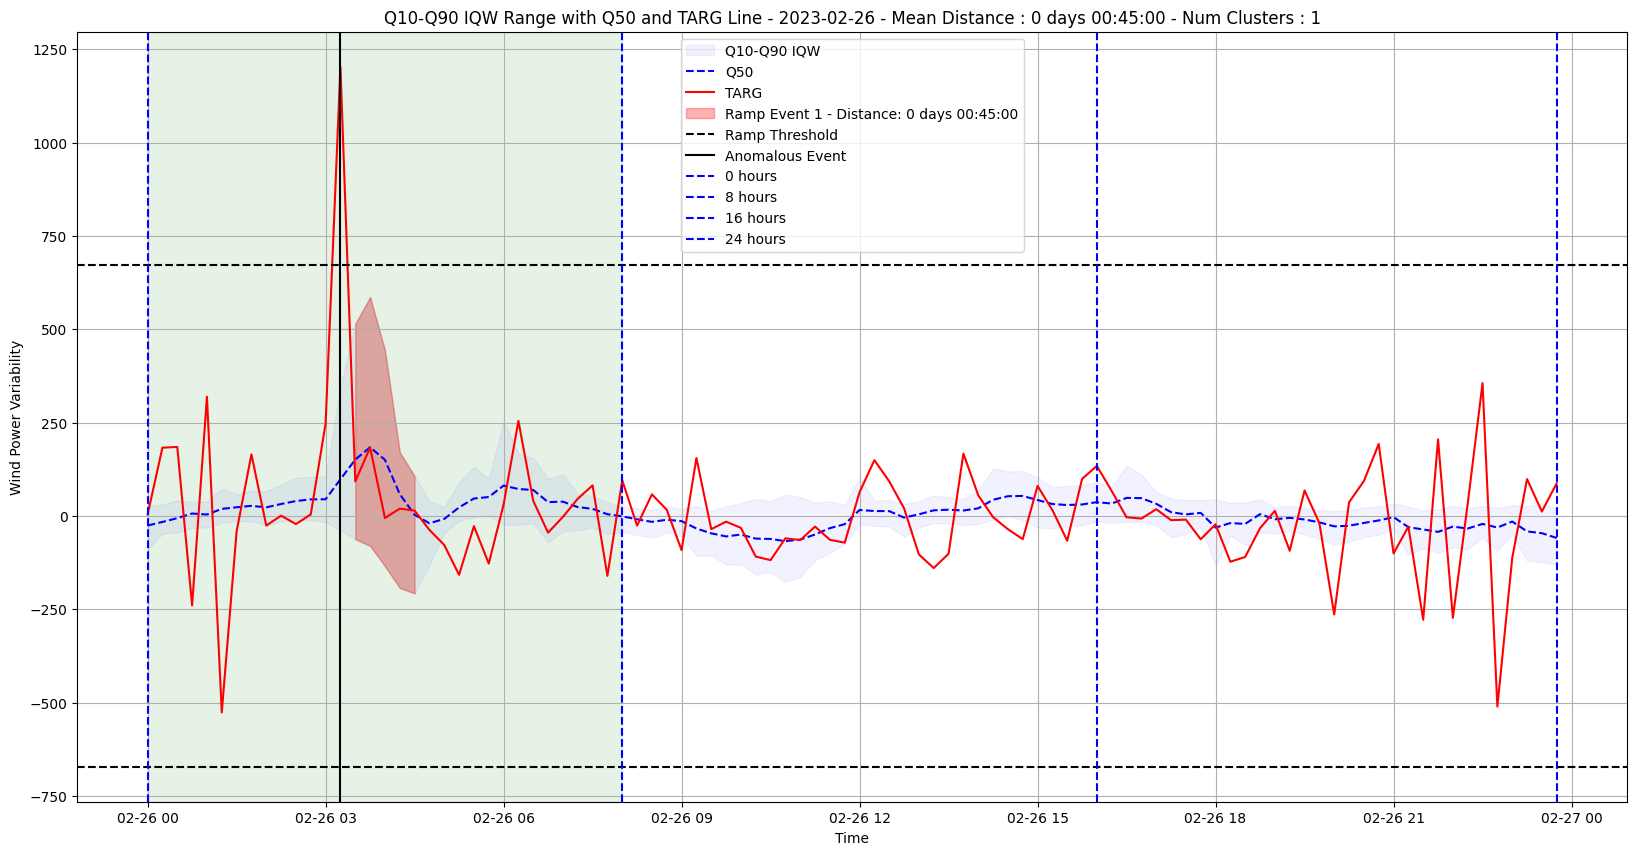

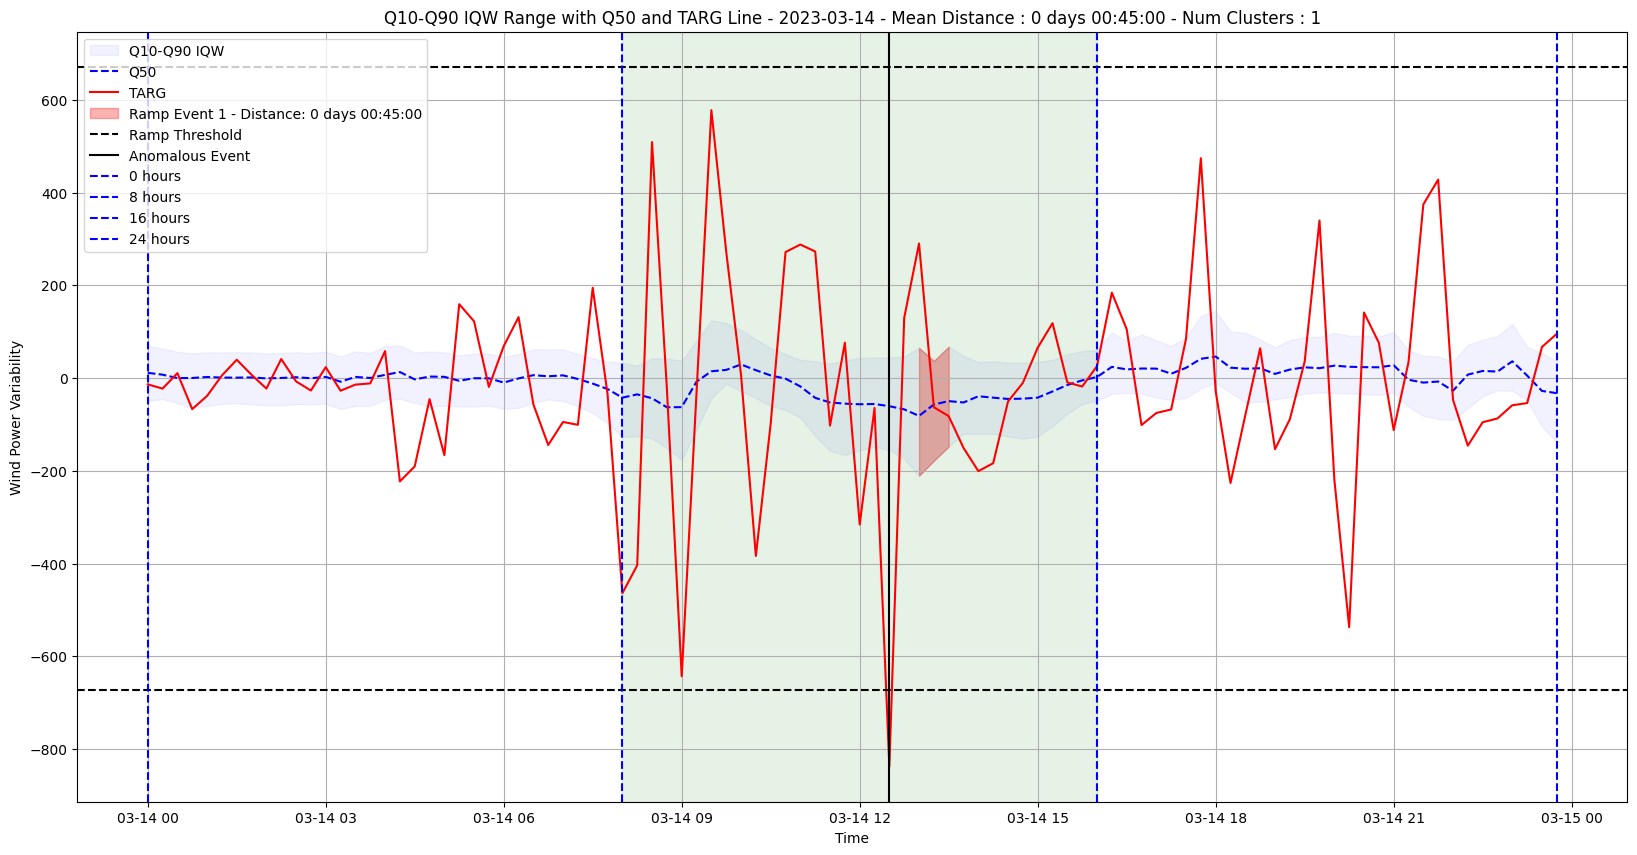

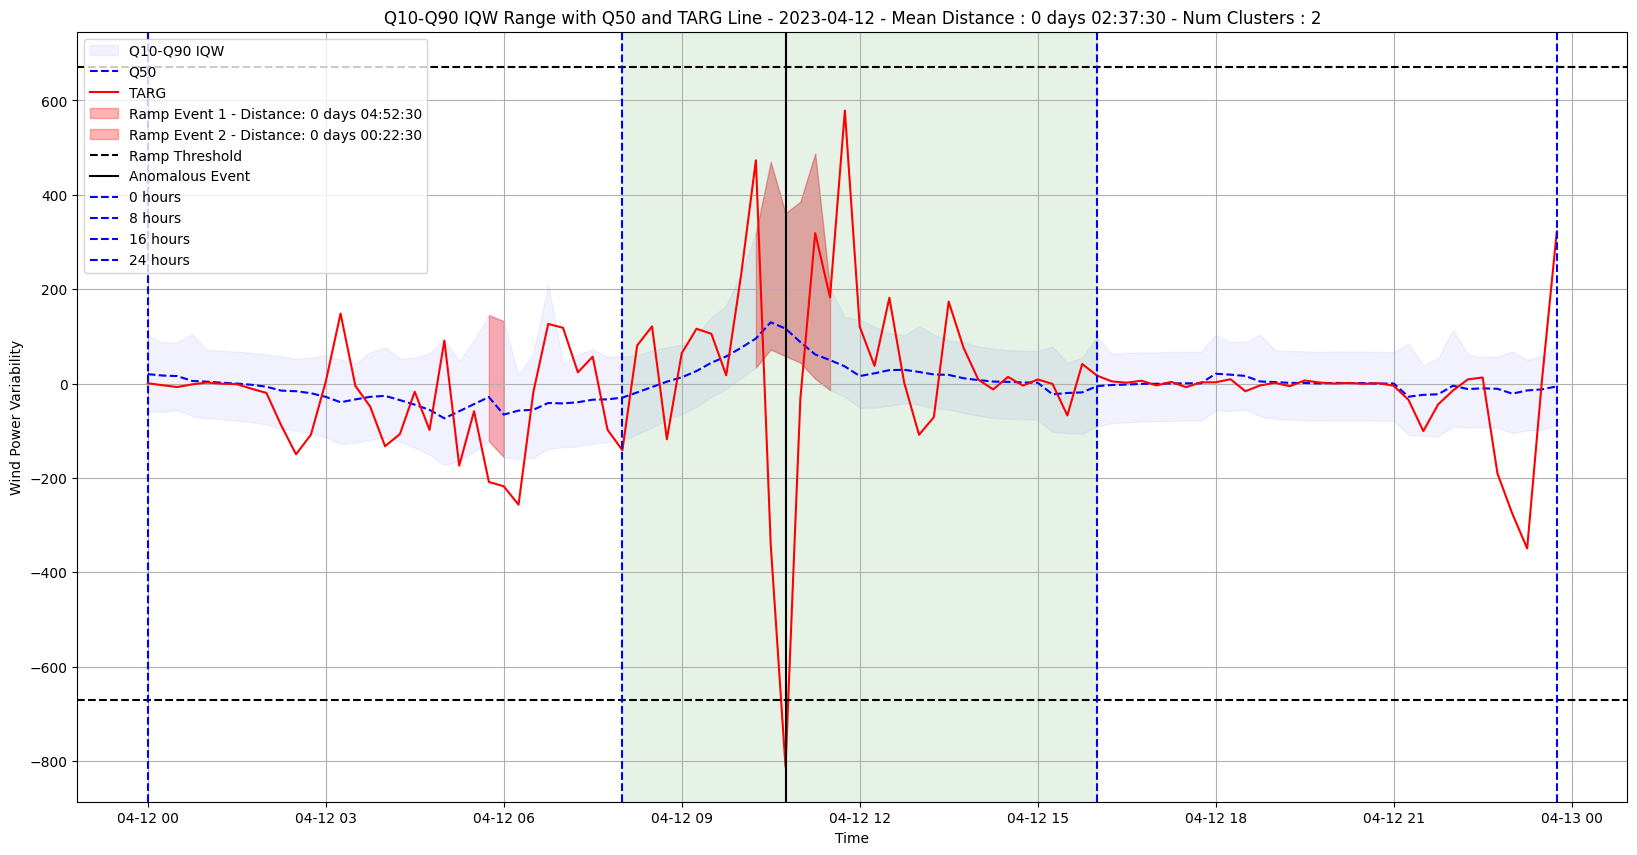

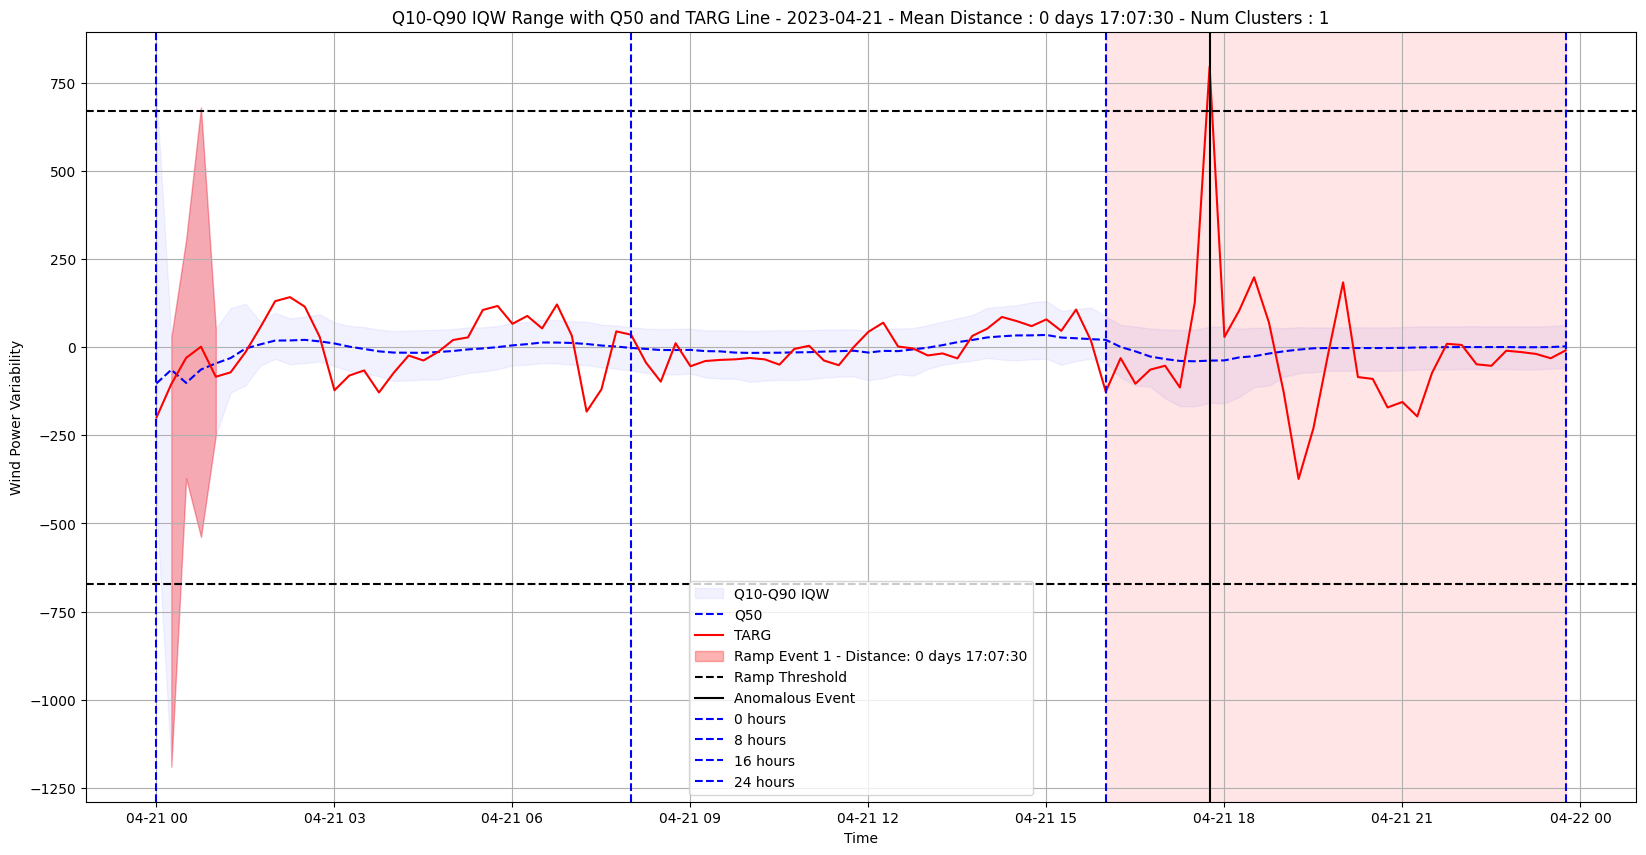

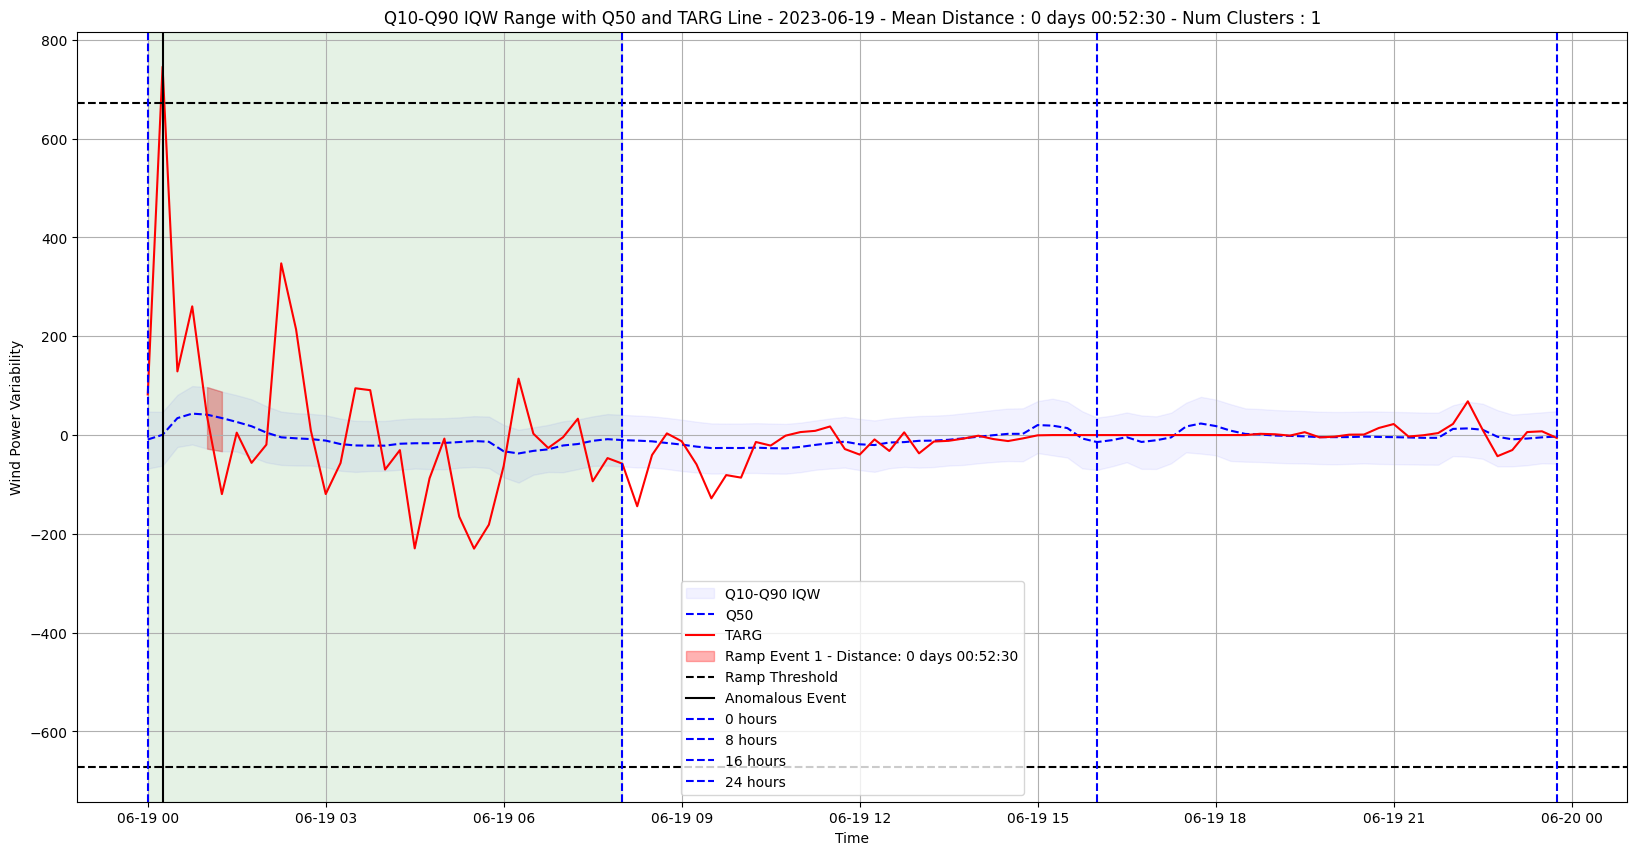

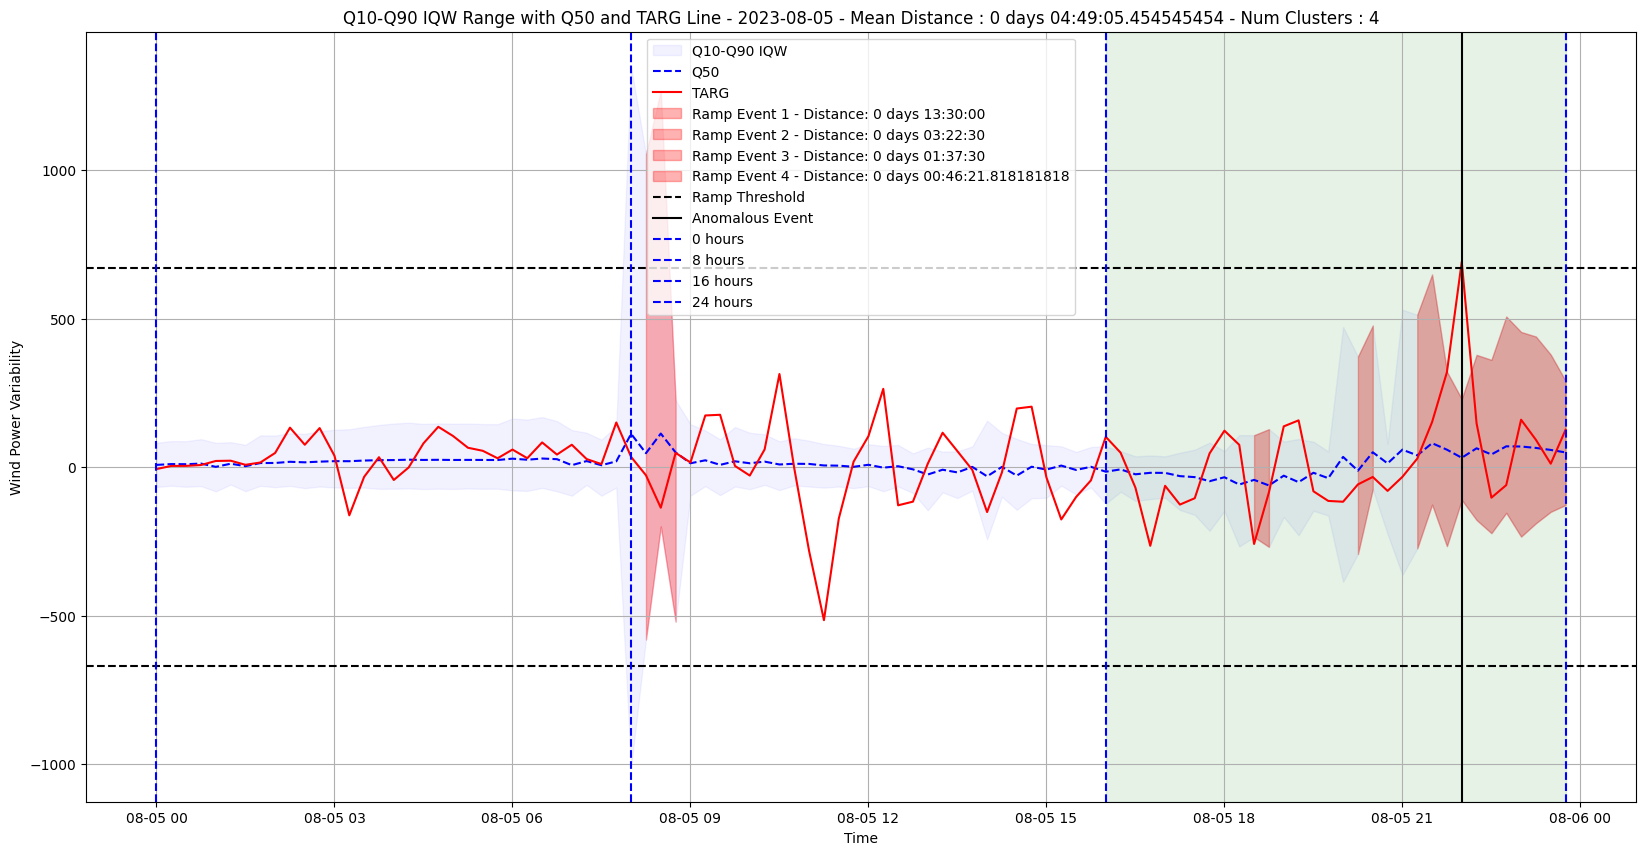

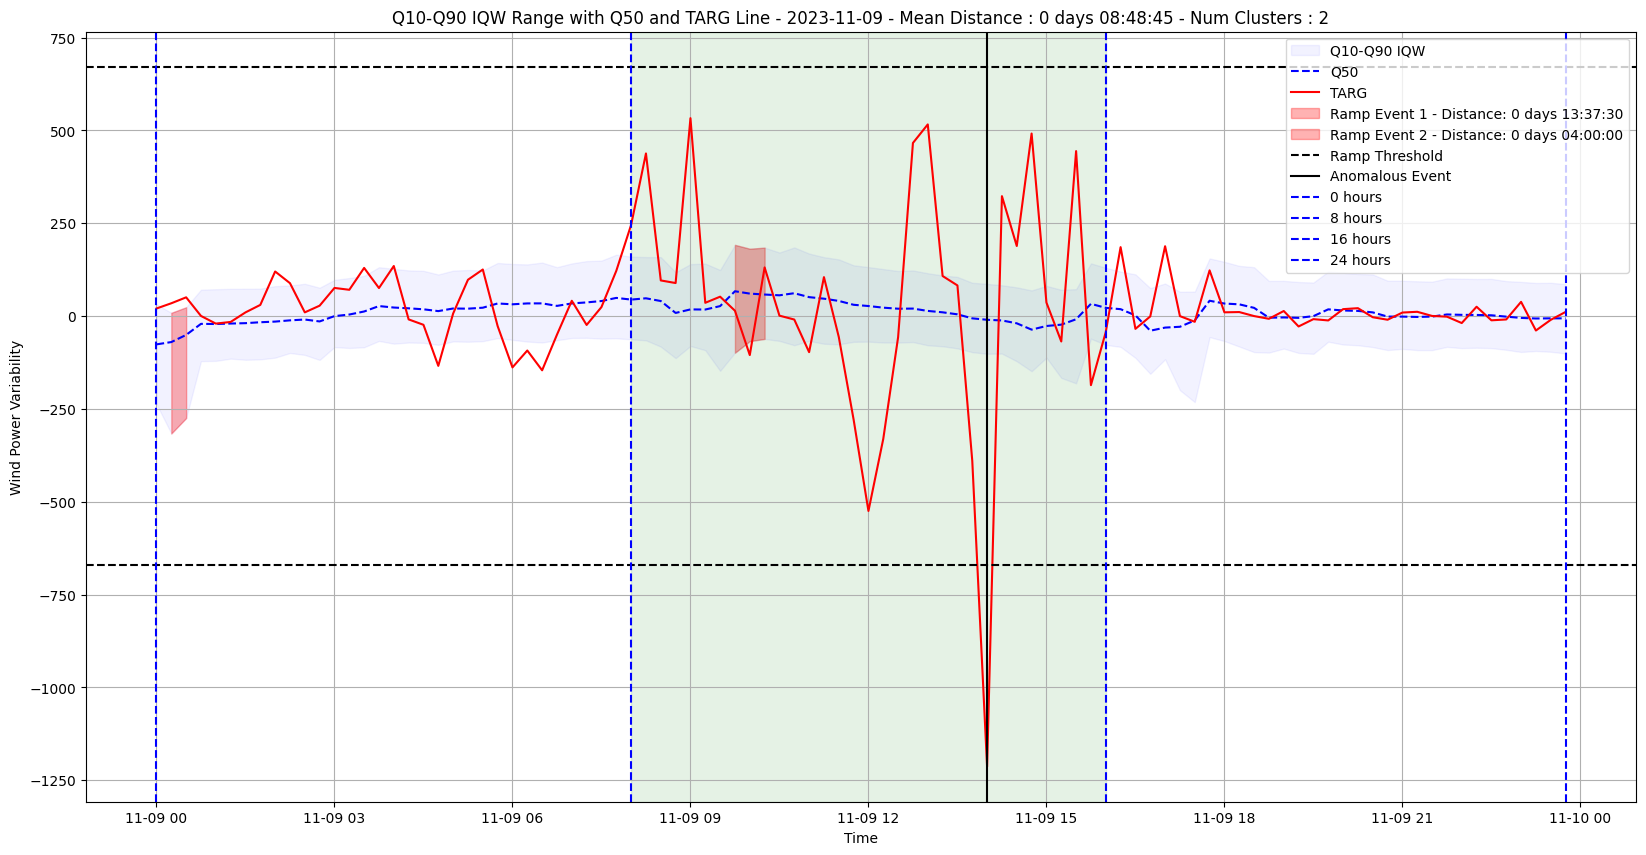

In [7]:

ramp_events_by_date = [data[i]['ramp_events_by_date'] for i in range(len(data)) if data[i]['threshold_quantile'] == threshold_quantile][0]

list_ramp_alarm_days = [data[i]['alarms_days'] for i in range(len(data)) if data[i]['threshold_quantile'] == threshold_quantile][0]

ramp_threshold = [data[i]['ramp_threshold'] for i in range(len(data)) if data[i]['threshold_quantile'] == threshold_quantile][0]

# Load results for ROC AUC scores
with open(f'/Users/gio/Desktop/Elia-RES-Forecasting/results/eq/{str_most_recent}/{max_consecutive_points}_{threshold_quantile}_roc_auc_eq.pkl', 'rb') as f:
    data = pickle.load(f)


roc_auc = [data[i]['roc_auc'] for i in range(len(data)) if data[i]['threshold_quantile'] == threshold_quantile][0]

df_ramp_events_detected, list_mean_distance = plot_ramp_events(ramp_events_by_date, 
                                                                list_ramp_alarm_days, 
                                                                ramp_threshold, 
                                                                plot_results=plot_results, 
                                                                max_consecutive_points=max_consecutive_points, 
                                                                plot_prediction=plot_prediction, 
                                                                plot_iqw=plot_iqw, 
                                                                cluster_color = cluster_color,
                                                                intraday = True)

In [8]:
if len(list_mean_distance) !=0:
    df_distance = pd.DataFrame(list_mean_distance)
    df_distance.columns = ['mean_distance_per_day', 'num_ramp', 'num_clusters']
    print(' ')
    print(df_distance)
    print('')
    print('Intraday Analysis: 8-hours time window')
    print('Error Phase', df_distance['mean_distance_per_day'].mean())
    print('Tot Number of Ramps Detected', df_distance['num_clusters'].sum())
    print('Tot Number of Ramps Observed', df_distance['num_ramp'].sum())
    # number of days with at least one ramp event
    print('Number of days with at least one ramp event', len(df_distance))



 
      mean_distance_per_day  num_ramp  num_clusters
0           0 days 00:45:00         1             1
1           0 days 00:45:00         1             1
2           0 days 00:22:30         1             1
3           0 days 00:00:00         1             0
4           0 days 00:52:30         1             1
5 0 days 01:55:27.272727272         1             3
6           0 days 04:00:00         1             1

Intraday Analysis: 8-hours time window
Error Phase 0 days 01:14:21.038961038
Tot Number of Ramps Detected 8
Tot Number of Ramps Observed 7
Number of days with at least one ramp event 7


In [9]:
ramp_events_by_intraday = [data[i]['ramp_events_by_intraday'] for i in range(len(data)) if data[i]['threshold_quantile'] == threshold_quantile][0]
list_ramp_alarm_days = [data[i]['alarms_days'] for i in range(len(data)) if data[i]['threshold_quantile'] == threshold_quantile][0]

from config.ramp_calib_setting import Simulation
import pandas as pd
import pickle
from loguru import logger
from source.utils.file_read import process_and_concat_files 

sim_params = Simulation.testing_period

sim_params = Simulation.testing_period

# process and concatenate files
files = [sim_params['file_1'], sim_params['file_2'], sim_params['file_3'], sim_params['file_4'], 
            sim_params['file_5'], sim_params['file_6'], sim_params['file_7'], sim_params['file_8'], 
            sim_params['file_9'], sim_params['file_10'], sim_params['file_11'], sim_params['file_12']]

df = process_and_concat_files(files)
df_variability = df['measured'].diff().to_frame()

# add true positive if "predicted" == 1 and "ramp_event"==1
ramp_events_by_intraday['tp'] = (ramp_events_by_intraday['predicted_ramps'] == 1) & (ramp_events_by_intraday['ramp_events'] == 1)
# add false positive if "predicted" == 1 and "ramp_event"==0
ramp_events_by_intraday['fp'] = (ramp_events_by_intraday['predicted_ramps'] == 1) & (ramp_events_by_intraday['ramp_events'] == 0)
# add true negative if "predicted" == 0 and "ramp_event"==0
ramp_events_by_intraday['tn'] = (ramp_events_by_intraday['predicted_ramps'] == 0) & (ramp_events_by_intraday['ramp_events'] == 0)
# add false negative if "predicted" == 0 and "ramp_event"==1
ramp_events_by_intraday['fn'] = (ramp_events_by_intraday['predicted_ramps'] == 0) & (ramp_events_by_intraday['ramp_events'] == 1)

# groupby 8-hours and compute max and min
df_variability_intraday_max = df_variability.groupby(pd.Grouper(freq='8h')).agg({'measured': 'max'})
df_variability_intraday_min = df_variability.groupby(pd.Grouper(freq='8h')).agg({'measured': 'min'})
df_variability_intraday_max_min = df_variability_intraday_max.join(df_variability_intraday_min, lsuffix='_max', rsuffix='_min')

# # join with ramp_events_by_date by datetime on ramp_events_by_date
ramp_events_by_intraday = ramp_events_by_intraday.set_index('datetime')

df_variability_intraday = df_variability_intraday_max_min.join(ramp_events_by_intraday, how='inner')

df_variability_intraday['measured'] = df_variability_intraday.apply(lambda x: x['measured_max'] if abs(x['measured_max']) > abs(x['measured_min']) else x['measured_min'], axis=1)

# stack plot boxplot of variability by ramp event for true positive, false positive, true negative, false negative
df_variability_tp = df_variability_intraday[df_variability_intraday['tp'] == True]

# concatenate all list_ramp_alarm_days[i][0] for i in range(len(list_ramp_alarm_days))
list_ramp = [list_ramp_alarm_days[i][0] for i in range(len(list_ramp_alarm_days))]
df_is_anomalous = pd.concat([list_ramp_alarm_days[i][0] for i in range(len(list_ramp_alarm_days))])
df_is_anomalous = df_is_anomalous[df_is_anomalous['is_anomalous'] == True]
# get max Q90 and min Q10 for each 8-hour period
df_all = df_is_anomalous.groupby(pd.Grouper(freq='8h')).agg({'Q90': 'max', 'Q10': 'min'})
df_dropna = df_all.dropna()
# join df_variability_tp and df_dropna by datetime on df_variability_tp
df_variability_tp = df_variability_tp.join(df_dropna, how='inner')
df_variability_tp['direction'] = df_variability_tp.apply(lambda x: 'up' if abs(x['Q90']) > abs(x['Q10']) else 'down', axis=1) 
# if "measured" is positive and "direction" is "up" or "measured" is negative and "direction" is "down" then "correct" is True
df_variability_tp['correct'] = (df_variability_tp['measured'] > 0) & (df_variability_tp['direction'] == 'up') | (df_variability_tp['measured'] < 0) & (df_variability_tp['direction'] == 'down')
# count in percentage the number of correct predictions
df_variability_tp['correct'].value_counts(normalize=True) * 100

correct
True     66.666667
False    33.333333
Name: proportion, dtype: float64

2023-02-25 02:00:00+00:00


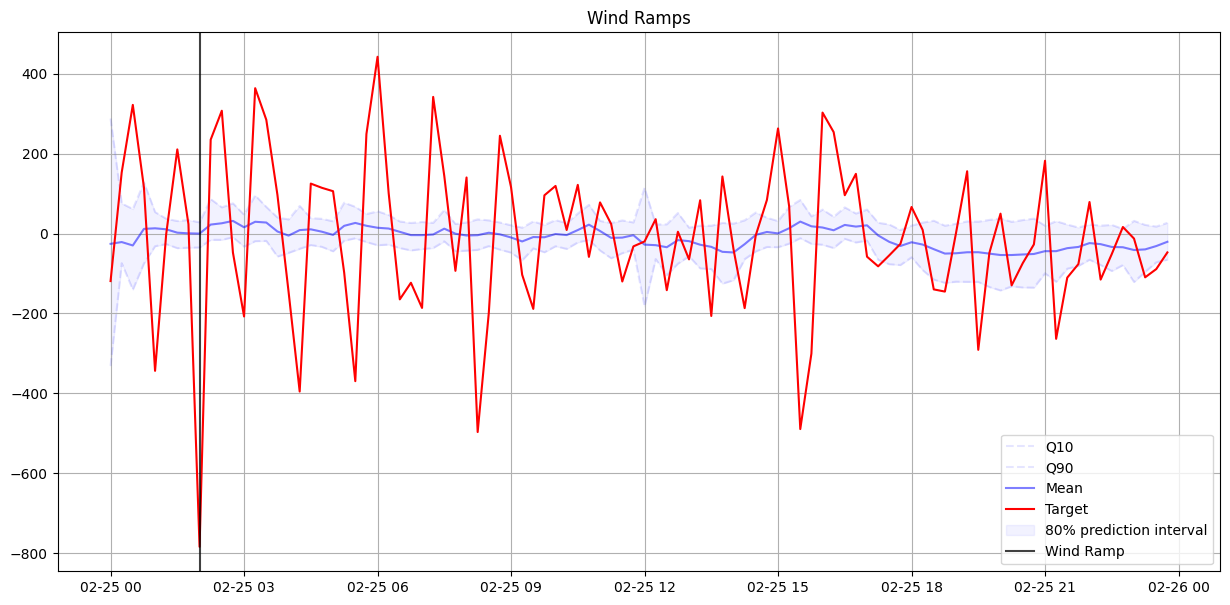

2023-02-26 03:15:00+00:00


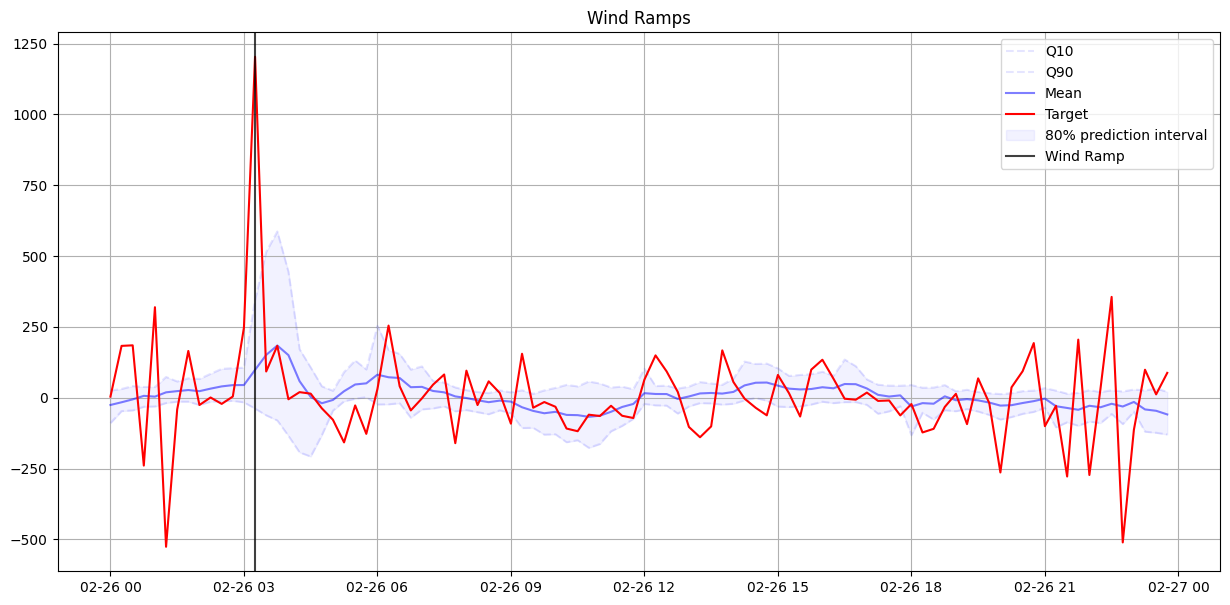

2023-03-14 12:30:00+00:00


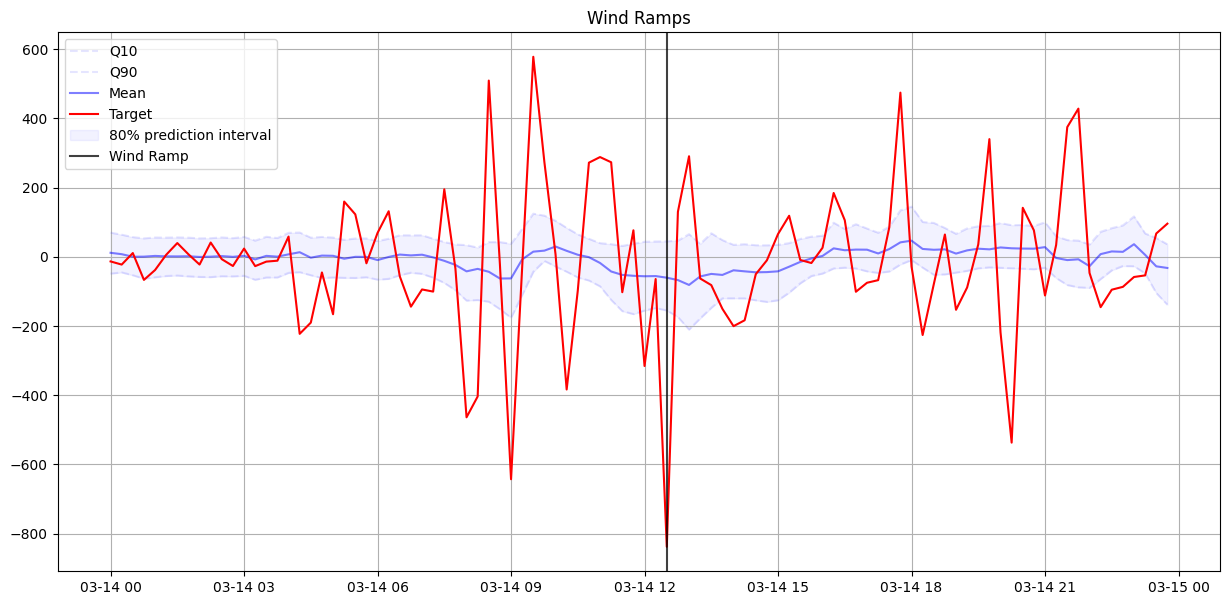

2023-03-27 05:45:00+00:00


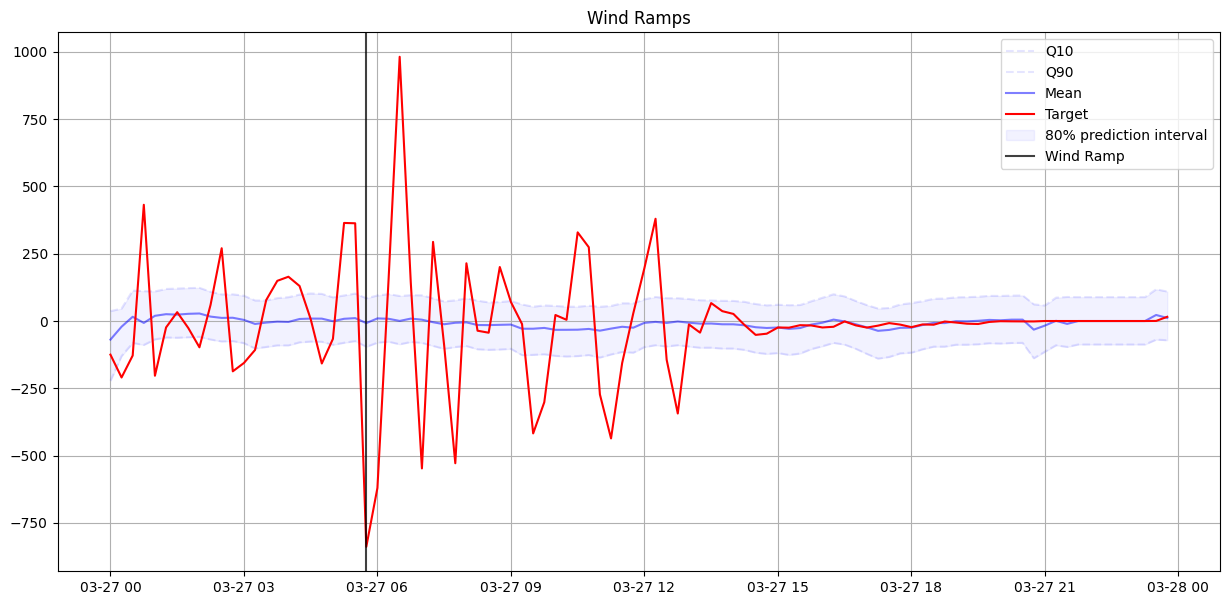

2023-04-12 10:45:00+00:00


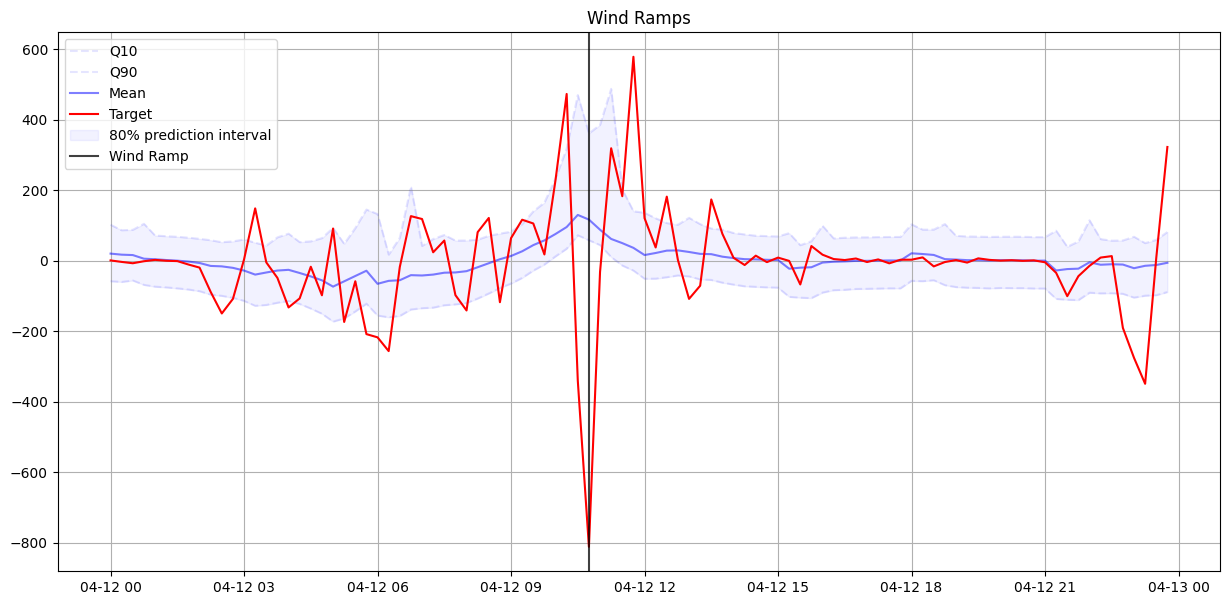

2023-04-21 17:45:00+00:00


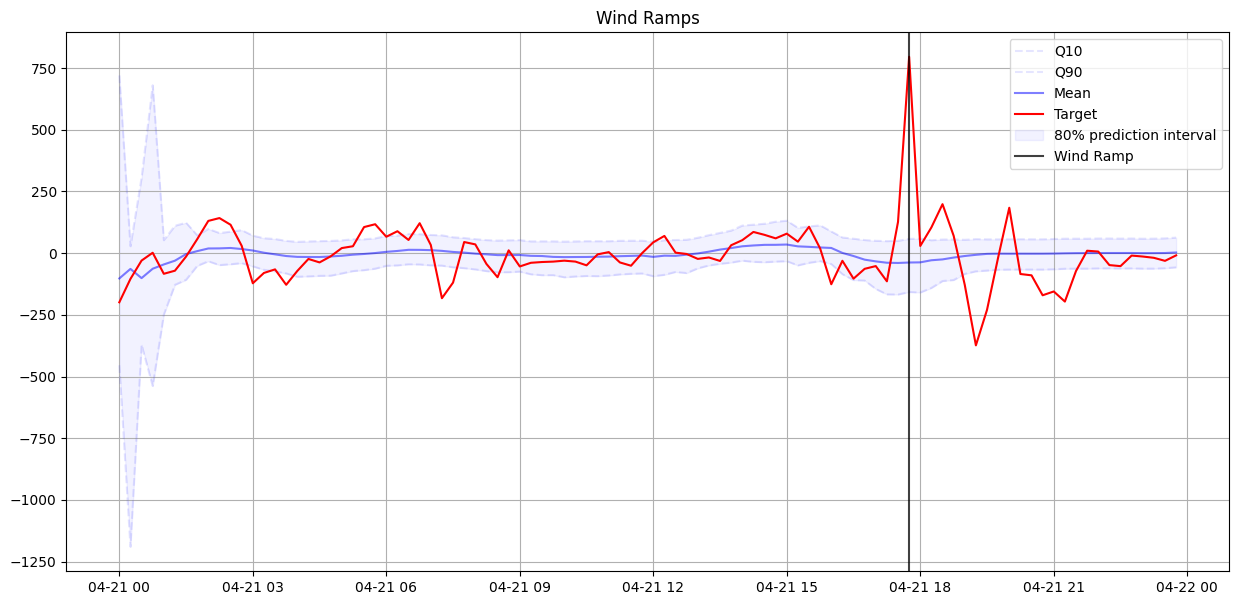

2023-06-19 00:15:00+00:00


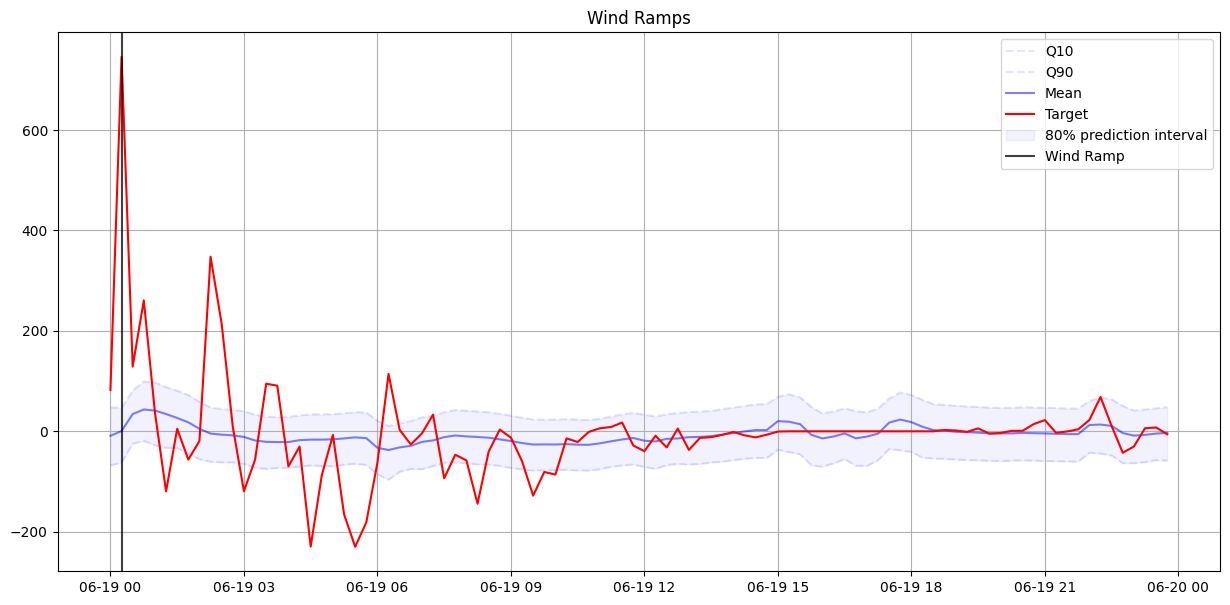

2023-06-20 12:15:00+00:00


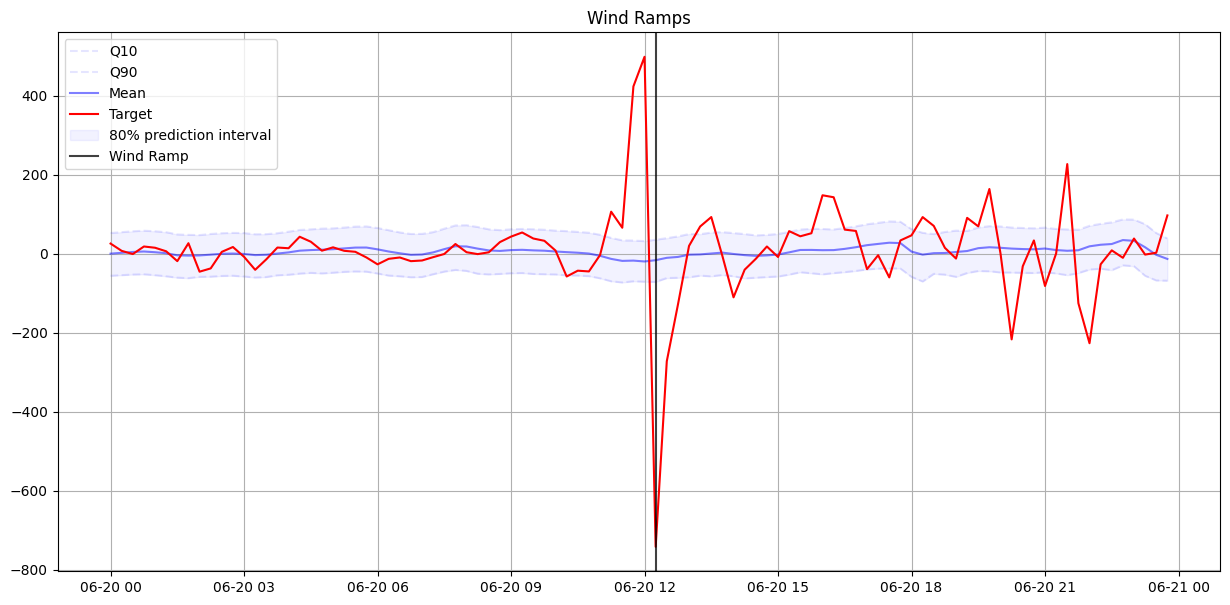

2023-08-05 22:00:00+00:00


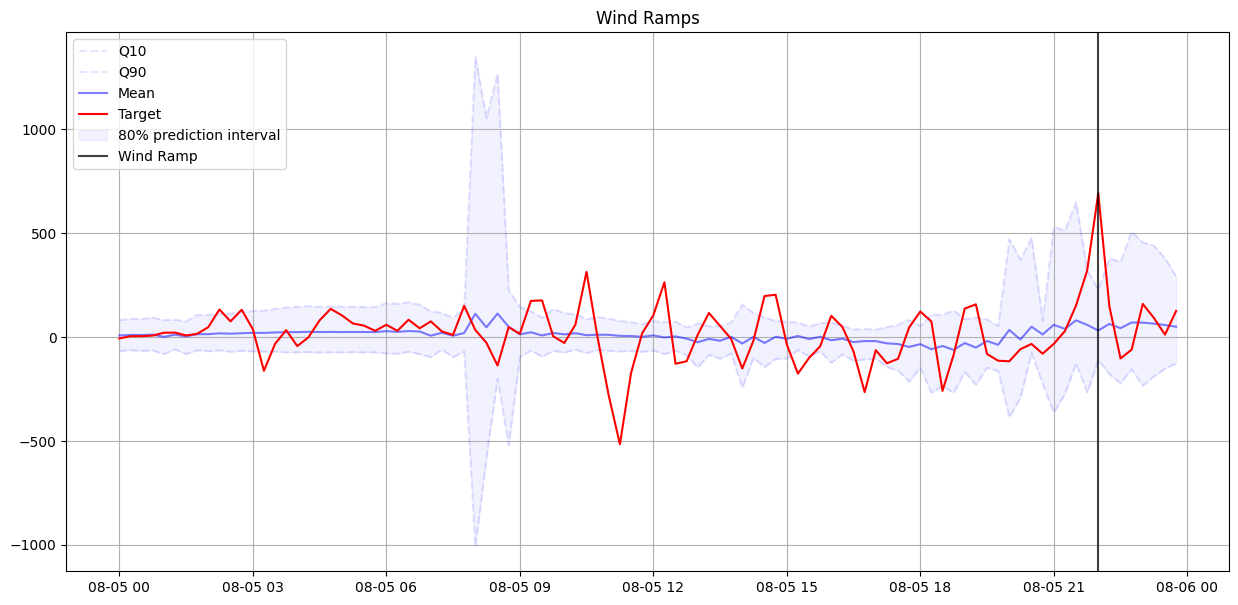

2023-11-09 14:00:00+00:00


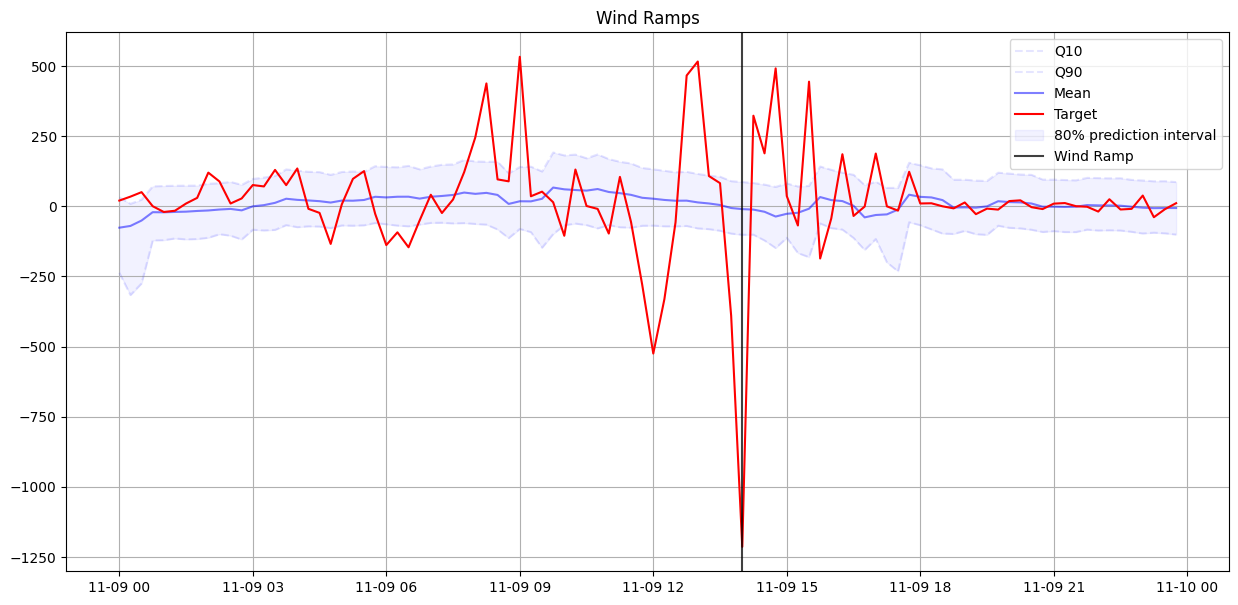

2023-11-10 13:30:00+00:00


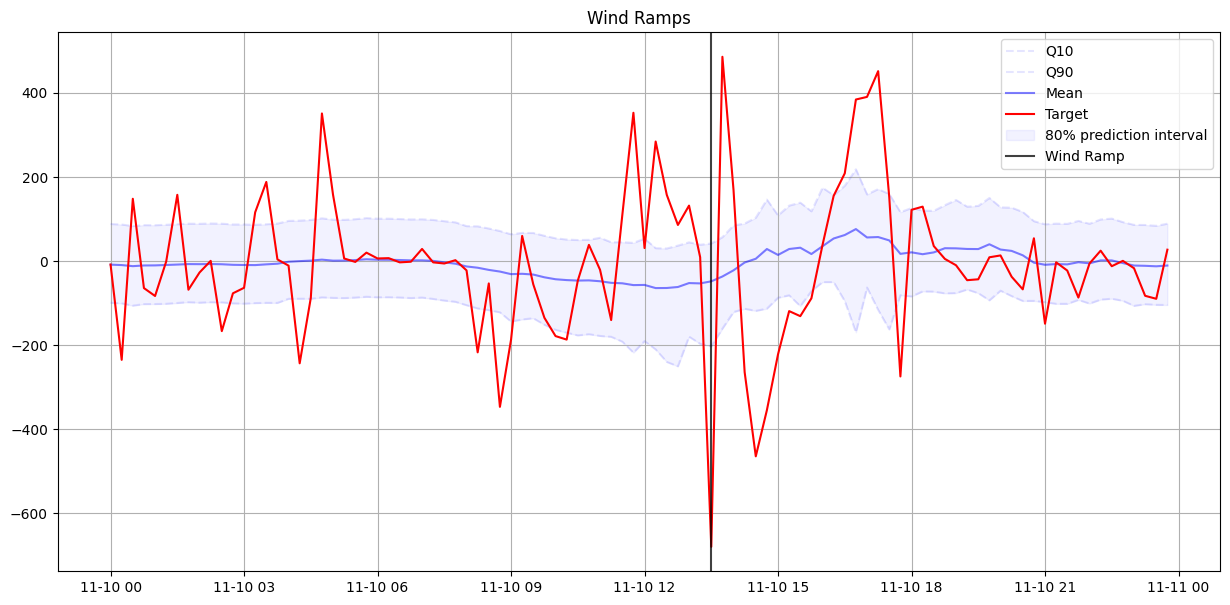

IndexError: list index out of range

In [10]:
for i in range(len(data[0])):

    df_wind_ramps = data[0]['lst_wind_ramps_days'][i][0]
    ramp = data[0]['lst_wind_ramps_days'][i][-1][0]

    print(ramp)

    df_pred = df_wind_ramps[['Q50', 'Q10', 'Q90']]
    df_pred.columns = ['MEAN', 'Q10', 'Q90']

    df_target = df_wind_ramps[['TARG']]

    " Plot ensemble forecasts "
    assert 'TARG' in list(df_target), 'TARG not in df_target'
    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.plot(df_pred.index, df_pred['Q10'], color='blue', linestyle='--', alpha=0.1, label='Q10')
    ax.plot(df_pred.index, df_pred['Q90'], color='blue', linestyle='--', alpha=0.1, label='Q90')
    ax.plot(df_pred.index, df_pred['MEAN'], color='blue', alpha=0.5, label='Mean')
    ax.plot(df_target.index, df_target['TARG'], color='red', label='Target')
    ax.fill_between(df_pred.index, df_pred['Q10'], df_pred['Q90'], color='blue', alpha=0.05, label='80% prediction interval')
    ax.axvline(ramp, color='black', alpha=0.75, label=f'Wind Ramp')
    ax.grid(True)
    ax.legend()
    plt.title("Wind Ramps")
    plt.show()